<a href="https://colab.research.google.com/github/subhobrata/fastai/blob/master/Copy_of_Lesson8_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install https://github.com/fastai/fastai/archive/master.zip
!pip install fastai==0.7.0
!pip install torchtext==0.2.3
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!mkdir data
!wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar -P data/
!wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip -P data/
!tar -xf data/VOCtrainval_06-Nov-2007.tar -C data/
!unzip data/PASCAL_VOC.zip -d data/
!rm -rf data/PASCAL_VOC.zip data/VOCtrainval_06-Nov-2007.tar

    100% |████████████████████████████████| 122kB 3.9MB/s 
    100% |████████████████████████████████| 1.5MB 13.6MB/s 
    100% |████████████████████████████████| 3.6MB 1.2MB/s 
    100% |████████████████████████████████| 496.4MB 37kB/s 
    100% |████████████████████████████████| 12.4MB 2.7MB/s 
    100% |████████████████████████████████| 61kB 22.0MB/s 
    100% |████████████████████████████████| 81kB 25.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built feather-format bcolz
mizani 0.5.3 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
!pip install Pillow

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
#from PIL import ImageDraw, ImageFont
import PIL
from matplotlib import patches, patheffects
#torch.cuda.set_device(3)

In [5]:
!dir

data  sample_data


In [6]:
cd data

/content/data


In [7]:
!dir

PASCAL_VOC  VOCdevkit


In [8]:
cd ..

/content


In [9]:
!dir

data  sample_data


## Pascal VOC

We will be looking at the [Pascal VOC](http://host.robots.ox.ac.uk/pascal/VOC/) dataset. It's quite slow, so you may prefer to download from [this mirror](https://pjreddie.com/projects/pascal-voc-dataset-mirror/). There are two different competition/research datasets, from 2007 and 2012. We'll be using the 2007 version. You can use the larger 2012 for better results, or even combine them (but be careful to avoid data leakage between the validation sets if you do this).

Unlike previous lessons, we are using the python 3 standard library `pathlib` for our paths and file access. Note that it returns an OS-specific class (on Linux, `PosixPath`) so your output may look a little different. Most libraries than take paths as input can take a pathlib object - although some (like `cv2`) can't, in which case you can use `str()` to convert it to a string.

In [10]:
#PATH = Path('data/PASCAL_VOC')
#list(PATH.iterdir())
PATH = Path('data')
list((PATH/'PASCAL_VOC').iterdir())


[PosixPath('data/PASCAL_VOC/pascal_train2007.json'),
 PosixPath('data/PASCAL_VOC/pascal_val2012.json'),
 PosixPath('data/PASCAL_VOC/pascal_test2007.json'),
 PosixPath('data/PASCAL_VOC/pascal_val2007.json'),
 PosixPath('data/PASCAL_VOC/pascal_train2012.json')]

In [0]:
# from google.colab import files
# downloaded = files.download('data/PASCAL_VOC/pascal_train2007.json')

As well as the images, there are also *annotations* - *bounding boxes* showing where each object is. These were hand labeled. The original version were in XML, which is a little hard to work with nowadays, so we uses the more recent JSON version which you can download from [this link](https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip).

You can see here how `pathlib` includes the ability to open files (amongst many other capabilities).

In [11]:
training_json = json.load((PATH/'PASCAL_VOC'/'pascal_train2007.json').open()) # training_json is a dict
training_json.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [12]:
training_json.items()

dict_items([('images', [{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12}, {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17}, {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23}, {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26}, {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}, {'file_name': '000033.jpg', 'height': 366, 'width': 500, 'id': 33}, {'file_name': '000034.jpg', 'height': 500, 'width': 360, 'id': 34}, {'file_name': '000035.jpg', 'height': 375, 'width': 500, 'id': 35}, {'file_name': '000036.jpg', 'height': 500, 'width': 332, 'id': 36}, {'file_name': '000042.jpg', 'height': 335, 'width': 500, 'id': 42}, {'file_name': '000044.jpg', 'height': 333, 'width': 500, 'id': 44}, {'file_name': '000047.jpg', 'height': 333, 'width': 500, 'id': 47}, {'file_name': '000048.jpg', 'height': 500, 'width': 375, 'id': 48}, {'file_name': '000061.jpg', 'height': 333, 'width': 500, 'id': 61}, {'file_name': '000064.jp

In [0]:
# print(list(training_json)[0])

It's helpful to use constants instead of strings, since we get tab-completion and don't mistype.

In [0]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']


In [15]:
training_json[IMAGES][0]

{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500}

In [16]:
training_json[ANNOTATIONS][0]

{'area': 34104,
 'bbox': [155, 96, 196, 174],
 'category_id': 7,
 'id': 1,
 'ignore': 0,
 'image_id': 12,
 'iscrowd': 0,
 'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]}

In [17]:
training_json[CATEGORIES][0]

{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'}

In [18]:
training_json[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [19]:
training_json[ANNOTATIONS][:3]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]},
 {'area': 81326,
  'bbox': [89, 77, 314, 259],
  'category_id': 13,
  'id': 3,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[89, 77, 89, 336, 403, 336, 403, 77]]}]

In [20]:
training_json[CATEGORIES][:20]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'},
 {'id': 5, 'name': 'bottle', 'supercategory': 'none'},
 {'id': 6, 'name': 'bus', 'supercategory': 'none'},
 {'id': 7, 'name': 'car', 'supercategory': 'none'},
 {'id': 8, 'name': 'cat', 'supercategory': 'none'},
 {'id': 9, 'name': 'chair', 'supercategory': 'none'},
 {'id': 10, 'name': 'cow', 'supercategory': 'none'},
 {'id': 11, 'name': 'diningtable', 'supercategory': 'none'},
 {'id': 12, 'name': 'dog', 'supercategory': 'none'},
 {'id': 13, 'name': 'horse', 'supercategory': 'none'},
 {'id': 14, 'name': 'motorbike', 'supercategory': 'none'},
 {'id': 15, 'name': 'person', 'supercategory': 'none'},
 {'id': 16, 'name': 'pottedplant', 'supercategory': 'none'},
 {'id': 17, 'name': 'sheep', 'supercategory': 'none'},
 {'id': 18, 'name': 'sofa', 'supercategory': 'none'},
 {'id': 

In [0]:
FILE_NAME,ID,IMG_ID,CATEGORY_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

categories = {o[ID]:o['name'] for o in training_json[CATEGORIES]}
training_filenames = {o[ID]:o[FILE_NAME] for o in training_json[IMAGES]}
training_ids = [o[ID] for o in training_json[IMAGES]]

# categories and training_filenames are dicts || training_ids is a list

In [0]:
#training_ids

In [22]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())
#list(('VOCdevkit'/'VOC2007').iterdir())

[PosixPath('data/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('data/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('data/VOCdevkit/VOC2007/Annotations'),
 PosixPath('data/VOCdevkit/VOC2007/ImageSets')]

In [0]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [24]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('data/VOCdevkit/VOC2007/JPEGImages/008709.jpg'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages/003642.jpg'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages/000215.jpg'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages/006337.jpg'),
 PosixPath('data/VOCdevkit/VOC2007/JPEGImages/009823.jpg')]

In [0]:
#Each image has a unique ID.

In [25]:
# A 'IMAGE' sample key-value pair -  [{'FILE_NAME': '000012.jpg', 'height': 333, 'ID': 12, 'width': 500},
im0_d = training_json[IMAGES][0]
im0_d

{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500}

In [26]:
im0_d[FILE_NAME],im0_d[ID] 

('000012.jpg', 12)

Python's defaultdict is useful any time you want to have a default dictionary entry for new keys. If you try and access a key that doesn’t exist, it magically makes itself exist and it sets itself equal to the return value of the function you specify (in this case lambda:[]).

In [0]:
# A 'ANNOTATION' sample key-value pair -
# [{'area': 34104,
#   'BBOX': [155, 96, 196, 174],
#   'category_id': 7,
#   'id': 1,
#   'ignore': 0,
#   'image_id': 12,
#   'iscrowd': 0,
#   'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 
# x, y, width, height -> bottom-left coord (y, x), top-right coord (y+height-1, x+width-1)  
  
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

training_annotations = collections.defaultdict(lambda:[])
for o in training_json[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        training_annotations[o[IMG_ID]].append((bb,o[CATEGORY_ID]))
        


In [28]:
for o in training_json[ANNOTATIONS][:1]:
    if not o['ignore']:
        bb = o[BBOX]
bb

[155, 96, 196, 174]

In [0]:
bb = hw_bb(bb)


In [30]:
bb

array([ 96, 155, 269, 350])

In [0]:
training_annotations[o[IMG_ID]].append((bb,o[CATEGORY_ID]))

In [32]:
len(training_annotations)

2501

In [33]:
im_a = training_annotations[im0_d[ID]]; 
im_a

[(array([ 96, 155, 269, 350]), 7), (array([ 96, 155, 269, 350]), 7)]

In [34]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [35]:
categories[7]

'car'

In [36]:
training_annotations[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [37]:
categories[15],categories[13]

('person', 'horse')

Some libs take VOC format bounding boxes, so this let's us convert back when required:

In [0]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc) # def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

In [0]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1]) 

In [40]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

Matplotlib's `plt.subplots` is a really useful wrapper for creating plots, regardless of whether you have more than one subplot. Note that Matplotlib has an optional object-oriented API which I think is much easier to understand and use (although few examples online use it!)

In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

A simple but rarely used trick to making text visible regardless of background is to use white text with black outline, or visa versa. Here's how to do it in matplotlib.

In [0]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

Note that `*` in argument lists is the [splat operator](https://stackoverflow.com/questions/5239856/foggy-on-asterisk-in-python). In this case it's a little shortcut compared to writing out `b[-2],b[-1]`.

In [0]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

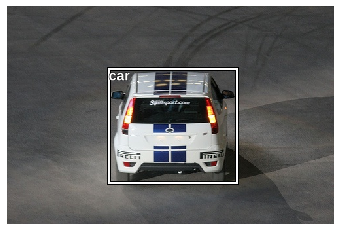

In [46]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], categories[im0_a[1]]) # b[:2] - > b[0] and b[1]... top left coordinates.

In [0]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], categories[c], sz=16)

In [0]:
def draw_idx(i):
    im_a = training_annotations[i]
    im = open_image(IMG_PATH/training_filenames[i])
    print(im.shape)
    draw_im(im, im_a)

(364, 480, 3)


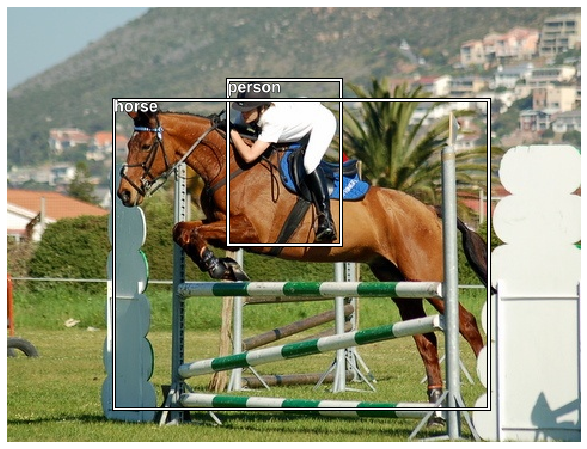

In [49]:
draw_idx(17)

## Largest item classifier

A *lambda function* is simply a way to define an anonymous function inline. Here we use it to describe how to sort the annotation for each image - by bounding box size (descending).

In [0]:
#get largest
def get_largest(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [0]:
x = ([96, 155, 269, 350],16)

In [52]:
x[0]

[96, 155, 269, 350]

In [53]:
x[0][-2:] # width x height of the bottom right bbox

[269, 350]

In [54]:
x[0][:2]  # x & y coord of the top left bbox

[96, 155]

In [0]:
#p.product(x[0][-2:] - x[0][:2])

In [56]:
training_annotations.items()

dict_items([(12, [(array([ 96, 155, 269, 350]), 7), (array([ 96, 155, 269, 350]), 7)]), (17, [(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]), (23, [(array([229,   8, 499, 244]), 2), (array([219, 229, 499, 333]), 2), (array([  0,   1, 368, 116]), 15), (array([  1,   2, 461, 242]), 15), (array([  0, 224, 485, 333]), 15)]), (26, [(array([124,  89, 211, 336]), 7)]), (32, [(array([ 77, 103, 182, 374]), 1), (array([ 87, 132, 122, 196]), 1), (array([179, 194, 228, 212]), 15), (array([188,  25, 237,  43]), 15)]), (33, [(array([106,   8, 262, 498]), 1), (array([199, 420, 225, 481]), 1), (array([187, 324, 222, 410]), 1)]), (34, [(array([166, 115, 399, 359]), 19), (array([152, 140, 228, 332]), 19)]), (35, [(array([ 95,   0, 360, 190]), 15), (array([ 97, 217, 317, 464]), 15)]), (36, [(array([ 78,  26, 343, 318]), 12)]), (42, [(array([ 31, 262, 294, 499]), 19), (array([ 35,   0, 298, 234]), 19)]), (44, [(array([  0,   0, 329, 369]), 9), (array([100,  98, 212, 311]), 8)]), (4

In [0]:
training_largest_annotations = {a: get_largest(b) for a,b in training_annotations.items()}

In [58]:
training_annotations[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [59]:
training_largest_annotations[17]

(array([ 77,  89, 335, 402]), 13)

Now we have a dictionary from image id to a single bounding box - the largest for that image.

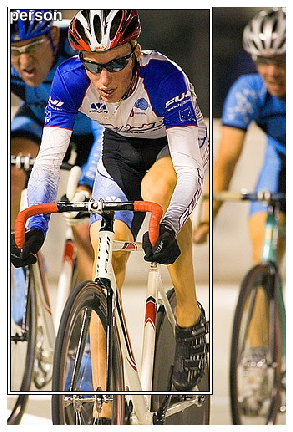

In [60]:
b,c = training_largest_annotations[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/training_filenames[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], categories[c], sz=16)

In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

Often it's easiest to simply create a CSV of the data you want to model, rather than trying to create a custom dataset. Here we use Pandas to help us create a CSV of the image filename and class.

In [0]:
# trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
#fn - filename, cat - categories
df = pd.DataFrame({'fn': [training_filenames[o] for o in training_ids],
    'cat': [categories[training_largest_annotations[o][1]] for o in training_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [0]:
f_model = resnet34
sz=224
bs=64

From here it's just like Dogs vs Cats!

In [0]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [0]:
x,y=next(iter(md.val_dl))

In [66]:
y[0:10]


 14
 17
  2
 14
 14
  5
 13
 10
  2
  9
[torch.cuda.LongTensor of size 10 (GPU 0)]

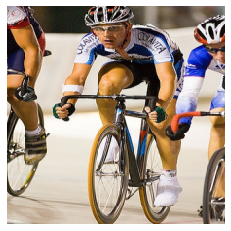

In [67]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [68]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

AttributeError: ignored

In [0]:
lrf=learn.lr_find(1e-5,100)

 78%|███████▊  | 25/32 [00:19<00:04,  1.54it/s, loss=11]  

When you LR finder graph looks like this, you can ask for more points on each end:

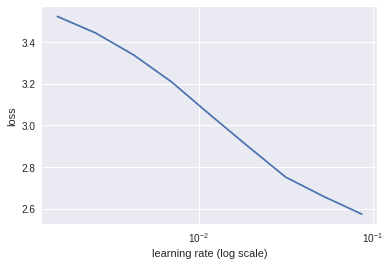

In [0]:
learn.sched.plot()

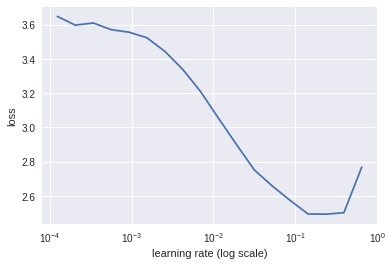

In [0]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [0]:
lr = 2e-2

In [0]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.339716   0.57519    0.822     


[array([0.57519]), 0.8219999976158142]

In [0]:
lrs = np.array([lr/1000,lr/100,lr])

In [0]:
learn.freeze_to(-2)

In [0]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [0]:
learn.fit(lrs/5, 1, cycle_len=1)

In [0]:
learn.unfreeze()

Accuracy isn't improving much - since many images have multiple different objects, it's going to be impossible to be that accurate.

In [0]:
learn.fit(lrs/5, 1, cycle_len=2)

In [0]:
learn.save('clas_one')

In [0]:
learn.load('clas_one')

Inside of a model data object, we have a bunch of things which include training data loader and training data set. The main thing to know about data loader is that it is an iterator that each time you grab the next iteration of stuff from it, you get a mini batch.

If you want to grab just a single batch, this is how you do it:



```
# x: independent variable
# y: dependent variable
x, y = next(iter(md.val_dl))
```



In [0]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs) # variables to numpy arrays
preds = np.argmax(preds, -1)

In [0]:
preds


In [0]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

It's doing a pretty good job of classifying the largest object!

## Bbox only

Now we'll try to find the bounding box of the largest object. This is simply a regression with 4 outputs. So we can use a CSV with multiple 'labels'.

In [0]:
BB_CSV = PATH/'tmp/bb.csv'

In [0]:
bb = np.array([training_largest_annotations[o][0] for o in training_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [training_filenames[o] for o in training_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [0]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '000012.jpg,96 155 269 350\n',
 '000017.jpg,77 89 335 402\n',
 '000023.jpg,1 2 461 242\n',
 '000026.jpg,124 89 211 336\n']

In [0]:
f_model=resnet34
sz=224
bs=64

Set `continuous=True` to tell fastai this is a regression problem, which means it won't one-hot encode the labels, and will use MSE as the default crit.

Note that we have to tell the transforms constructor that our labels are coordinates, so that it can handle the transforms correctly.

Also, we use CropType.NO because we want to 'squish' the rectangular images into squares, rather than center cropping, so that we don't accidentally crop out some of the objects. (This is less of an issue in something like imagenet, where there is a single object to classify, and it's generally large and centrally located).

In [0]:
augs = [RandomFlip(), 
        RandomRotate(30),
        RandomLighting(0.1,0.1)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

In [0]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [0]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

In [0]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [0]:
# Note that we have to tell the transforms constructor that our labels are coordinates, so that it can handle the transforms correctly.

In [0]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, bs=bs, continuous=True)

fastai let's you use a `custom_head` to add your own module on top of a convnet, instead of the adaptive pooling and fully connected net which is added by default. In this case, we don't want to do any pooling, since we need to know the activations of each grid cell.

The final layer has 4 activations, one per bounding box coordinate. Our target is continuous, not categorical, so the MSE loss function used does not do any sigmoid or softmax to the module outputs.

In [0]:
# Flatten()

#The previous layer generally has 7x7x512 param in ResNet34, so flatten that out into a single vector.

In [0]:
512*7*7

In [0]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [0]:
learn.summary()

In [0]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [0]:
lr = 2e-3

In [0]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

In [0]:
lrs = np.array([lr/100,lr/10,lr])

In [0]:
learn.freeze_to(-2)

In [0]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [0]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [0]:
learn.freeze_to(-3)

In [0]:
learn.fit(lrs, 1, cycle_len=2)

In [0]:
learn.save('reg4')

In [0]:
learn.load('reg4')

In [0]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

In [0]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

## Single object detection

In [0]:
f_model=resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(training_filenames))

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
   bs=bs, continuous=True, val_idxs=val_idxs)r

In [0]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

A dataset can be anything with `__len__` and `__getitem__`. Here's a dataset that adds a 2nd label to an existing dataset:

In [0]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

We'll use it to add the classes to the bounding boxes labels.

In [0]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

In [0]:
val_ds2[0][1]

We can replace the dataloaders' datasets with these new ones.

In [0]:
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

We have to `denorm`alize the images from the dataloader before they can be plotted.

In [0]:
x,y=next(iter(md.val_dl))
idx=3
ima=md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

In [0]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])

We need one output activation for each class (for its probability) plus one for each bounding box coordinate. We'll use an extra linear layer this time, plus some dropout, to help us train a more flexible model.

In [0]:
head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(categories)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [0]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

In [0]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=1e-2

In [0]:
learn.fit(lr, 1, cycle_len=3, use_clr=(32,5))

In [0]:
learn.save('reg1_0')

In [0]:
learn.freeze_to(-2)

In [0]:
lrs = np.array([lr/100, lr/10, lr])

In [0]:
learn.lr_find(lrs/1000)
learn.sched.plot(0)

In [0]:
learn.fit(lrs/5, 1, cycle_len=5, use_clr=(32,10))

In [0]:
learn.save('reg1_1')

In [0]:
learn.load('reg1_1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit(lrs/10, 1, cycle_len=10, use_clr=(32,10))

In [0]:
learn.save('reg1')

In [0]:
learn.load('reg1')

In [0]:
y = learn.predict()
x,_ = next(iter(md.val_dl))

In [0]:
from scipy.special import expit

In [0]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(to_np(x))[i]
    bb = expit(y[i][:4])*224
    b = bb_hw(bb)
    c = np.argmax(y[i][4:])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
    draw_text(ax, b[:2], md2.classes[c])
plt.tight_layout()

## End

In [0]:
bb_voc = [155, 96, 196, 174]

In [0]:
bb_voc[:2]